# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


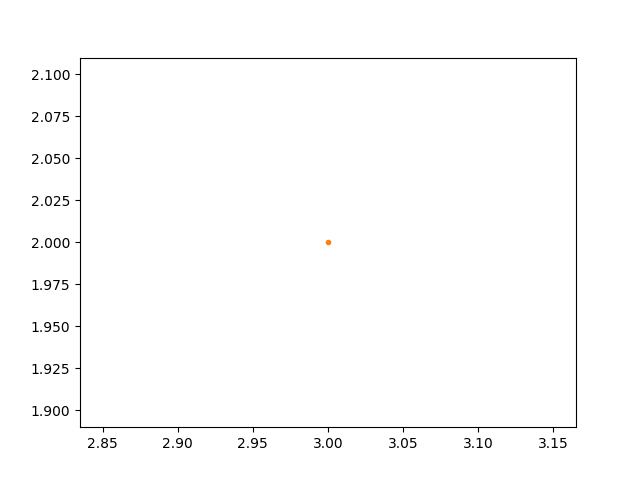

In [4]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

In [5]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer.

In [6]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [7]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


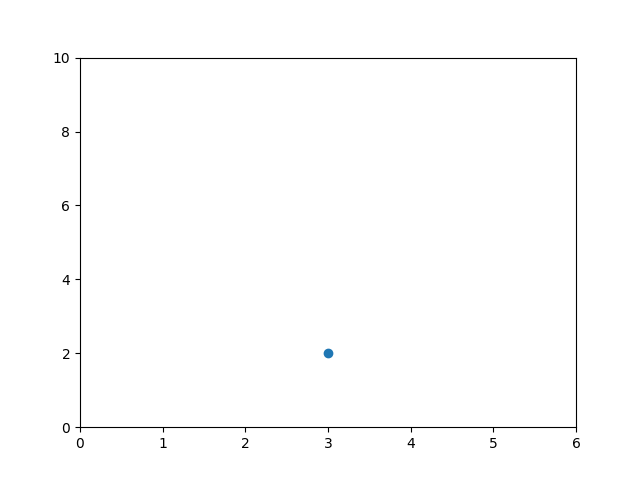

[0, 6, 0, 10]

In [8]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


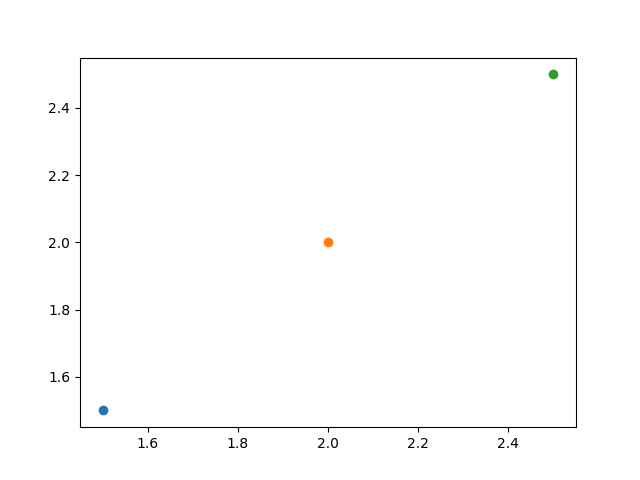

In [9]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

In [10]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

# Scatterplots

<IPython.core.display.Javascript object>


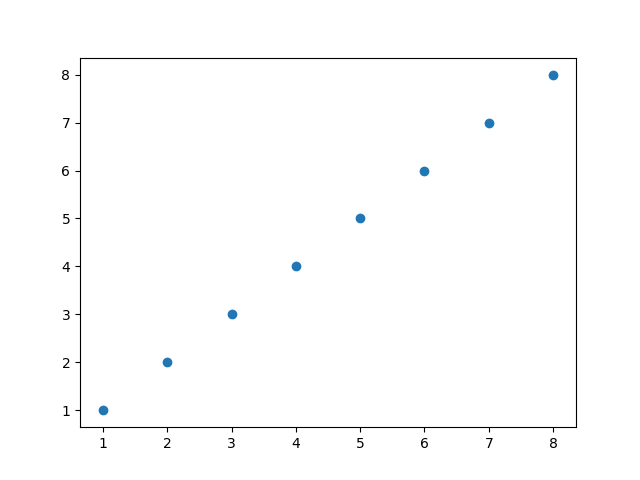

In [11]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


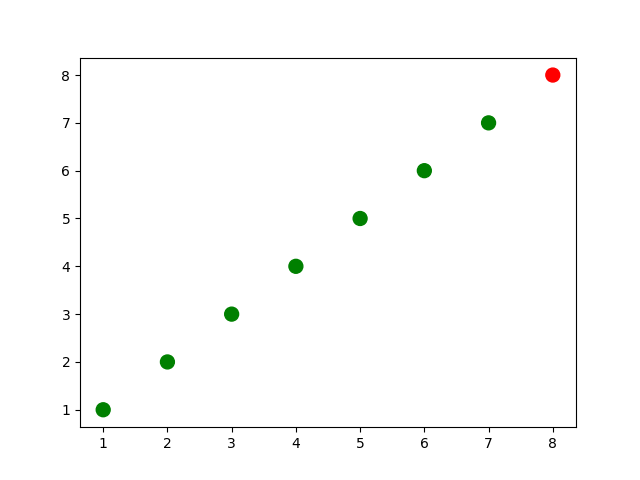

In [12]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [13]:
zip_generator = zip([2,2,3,4,5,11,12], [6,7,8,9,10],[6,7,8,9,10])
print(list(zip_generator))

[(2, 6, 6), (2, 7, 7), (3, 8, 8), (4, 9, 9), (5, 10, 10)]


In [14]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5,11,12], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [15]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


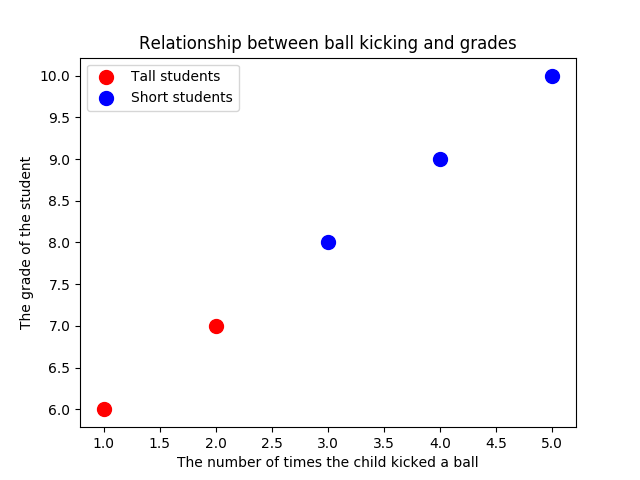

In [16]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [17]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

In [18]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [19]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [20]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

In [21]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [22]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [23]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


# Line Plots

<IPython.core.display.Javascript object>


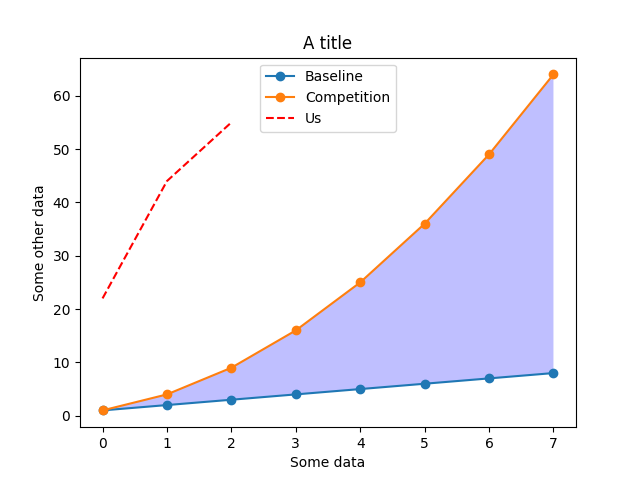

In [24]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

In [25]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [26]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [27]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

<IPython.core.display.Javascript object>


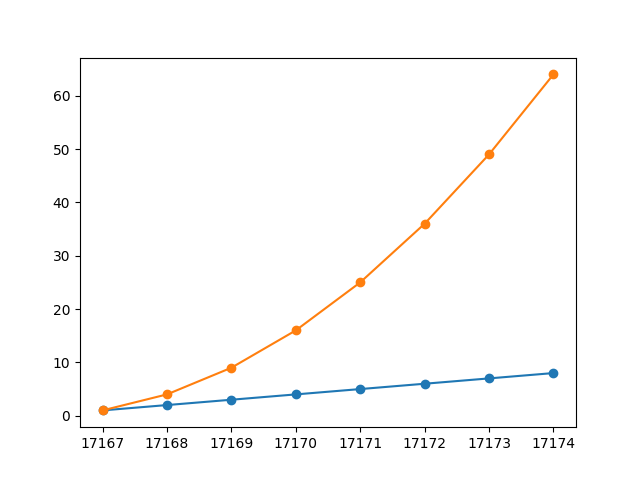

In [28]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

Let's try using pandas

<IPython.core.display.Javascript object>


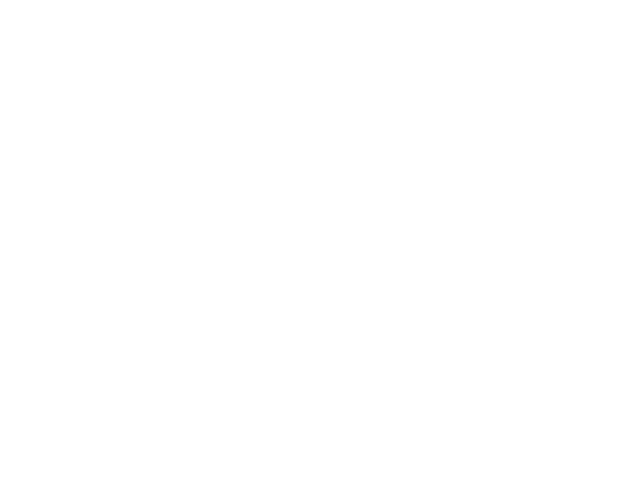

TypeError: object of type 'map' has no len()

In [29]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>


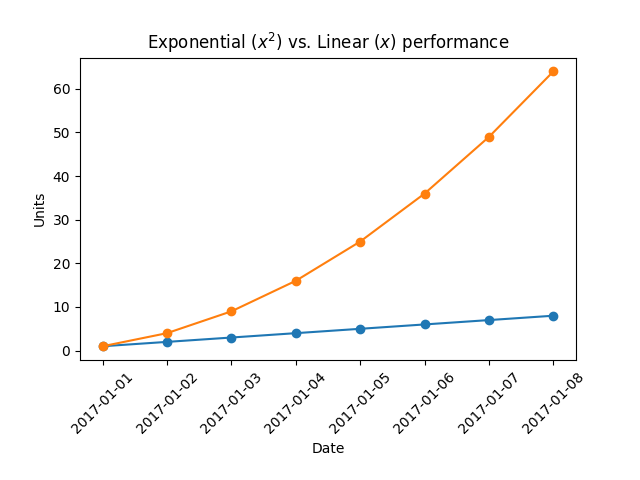

In [30]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [31]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [32]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [33]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [34]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

# Bar Charts

<IPython.core.display.Javascript object>


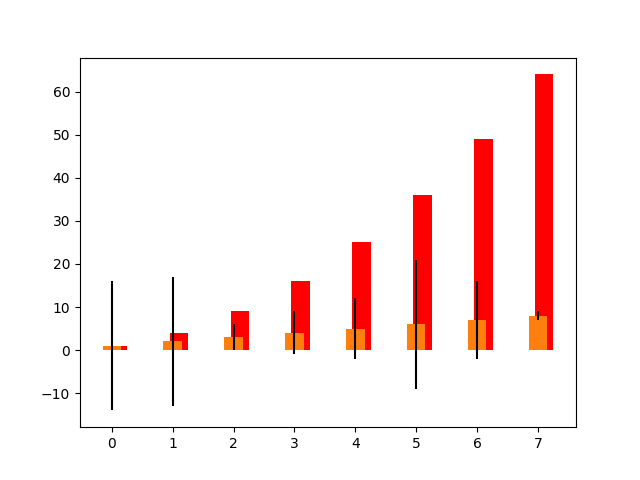

<Container object of 8 artists>

In [35]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [36]:
xvals

range(0, 8)

In [37]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.1)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

In [38]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 8 artists>

<IPython.core.display.Javascript object>


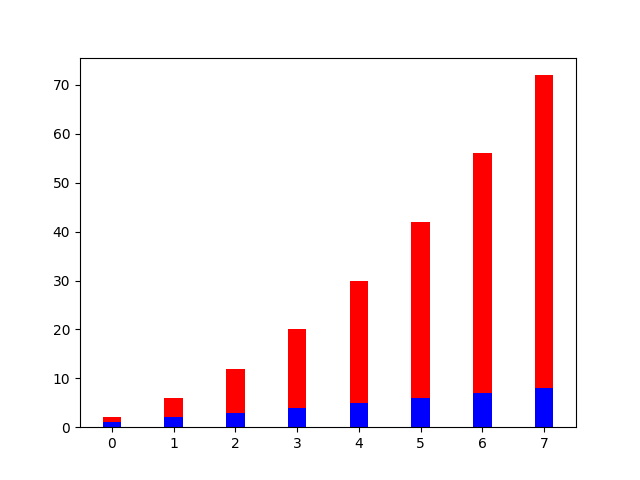

<Container object of 8 artists>

In [39]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


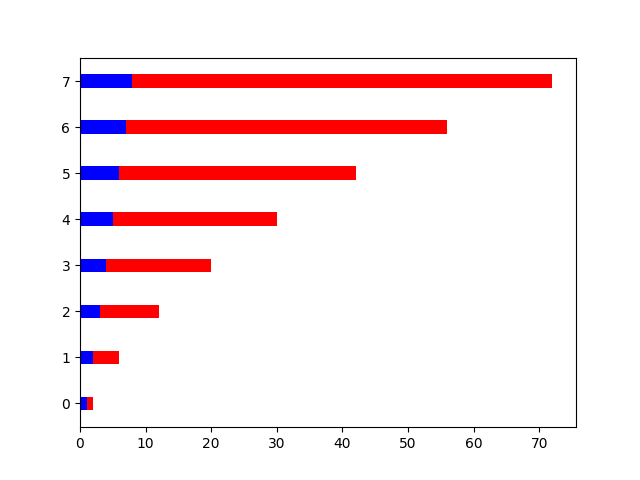

<Container object of 8 artists>

In [40]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

<IPython.core.display.Javascript object>


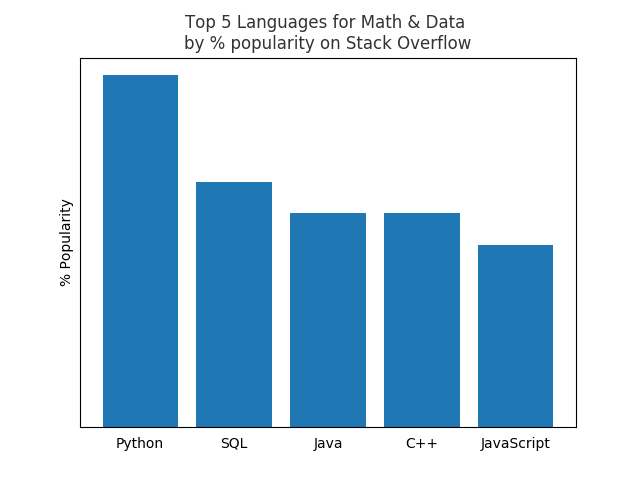

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

In [42]:
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

<IPython.core.display.Javascript object>


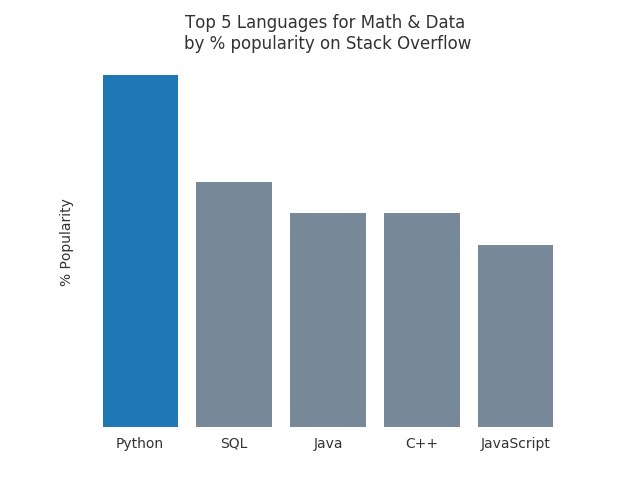

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


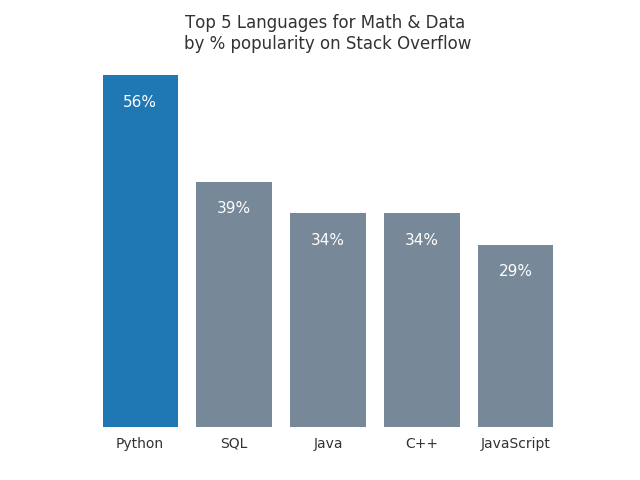

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

In [45]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

In [46]:
df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(400))
df

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.2620,55.6090,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.5000,65.8500,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...
5,AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0,2.896859e+05,4.082717e+06,241596.3290984556 to 338929.7578148215,4037600.0490367003 to 4134933.477753066,"241596.3290984556 to 338929.7578148215, 403760...",48b283514a28345d4229fc18d3d7560b150a5bfb6c2f50...
6,AG000060590,30.5667,2.8667,397.0,NaN,EL-GOLEA,GSN,NaN,60590.0,2.744669e+05,3.398867e+06,241596.3290984556 to 338929.7578148215,3356266.0480221435 to 3453599.4767385093,"241596.3290984556 to 338929.7578148215, 335626...",a7baf93a7b7b45104090ecc99c6a180bea3e09b1242d9a...
7,AG000060611,28.0500,9.6331,561.0,NaN,IN-AMENAS,GSN,NaN,60611.0,9.453331e+05,3.119022e+06,922930.3301130123 to 1020263.7588293783,3064265.761873048 to 3161599.1905894135,"922930.3301130123 to 1020263.7588293783, 30642...",65dec05c5044f25f9d23791cc08f321e687bfc6babdb00...
8,AG000060680,22.8000,5.4331,1362.0,NaN,TAMANRASSET,GSN,NaN,60680.0,5.569289e+05,2.535248e+06,533596.6152475514 to 630930.0439639173,2480265.1895748563 to 2577598.618291222,"533596.6152475514 to 630930.0439639173, 248026...",e094ef4d8963e9cbdd0798b91dfba0287524d37cf80818...
9,AGE00147708,36.7200,4.0500,222.0,NaN,TIZI OUZOU,NaN,NaN,60395.0,3.609777e+05,4.083083e+06,338929.75781482086 to 436263.18653118674,4037600.0490367003 to 4134933.477753066,"338929.75781482086 to 436263.18653118674, 4037...",433cdbd31331af05a10c59782423392d33e00cab736a13...


In [47]:
station_locations_by_hash = df[df['hash'] == 'b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c70211946acf33c']
station_locations_by_hash

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
5494,NOE00109561,59.6244,9.6378,170.0,NaN,KONGSBERG BRANNSTASJON,NaN,NaN,NaN,541910.542168,6.629940e+06,533596.6152475514 to 630930.0439639173,6568269.195662197 to 6665602.624378563,"533596.6152475514 to 630930.0439639173, 656826...",b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c7021...
5510,NOE00109885,59.8558,10.4367,163.0,NaN,ASKER,NaN,NaN,NaN,582782.451178,6.655671e+06,533596.6152475514 to 630930.0439639173,6568269.195662197 to 6665602.624378563,"533596.6152475514 to 630930.0439639173, 656826...",b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c7021...
5573,NOE00134274,59.9419,10.7200,94.0,NaN,OSLO - BLINDERN PLU,NaN,NaN,NaN,597052.144057,6.665245e+06,533596.6152475514 to 630930.0439639173,6568269.195662197 to 6665602.624378563,"533596.6152475514 to 630930.0439639173, 656826...",b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c7021...
5586,NOE00134850,59.1831,9.5667,136.0,NaN,SKIEN - GEITERYGGEN,NaN,NaN,NaN,544965.334579,6.580870e+06,533596.6152475514 to 630930.0439639173,6568269.195662197 to 6665602.624378563,"533596.6152475514 to 630930.0439639173, 656826...",b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c7021...
5591,NOE00135018,59.2300,10.3481,26.0,NaN,MELSOM,NaN,NaN,NaN,588668.550383,6.586085e+06,533596.6152475514 to 630930.0439639173,6568269.195662197 to 6665602.624378563,"533596.6152475514 to 630930.0439639173, 656826...",b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c7021...
5592,NOE00135030,59.1842,10.2553,88.0,NaN,TORP,NaN,NaN,NaN,584172.507035,6.580992e+06,533596.6152475514 to 630930.0439639173,6568269.195662197 to 6665602.624378563,"533596.6152475514 to 630930.0439639173, 656826...",b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c7021...
5597,NOM00001492,59.9428,10.7206,94.0,NaN,OSLO BLINDERN,NaN,NaN,1492.0,597069.354156,6.665345e+06,533596.6152475514 to 630930.0439639173,6568269.195662197 to 6665602.624378563,"533596.6152475514 to 630930.0439639173, 656826...",b211e0f8ac9d18bbd3d4766cebe74d244bc0a4018c7021...


In [48]:
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

<IPython.core.display.Javascript object>


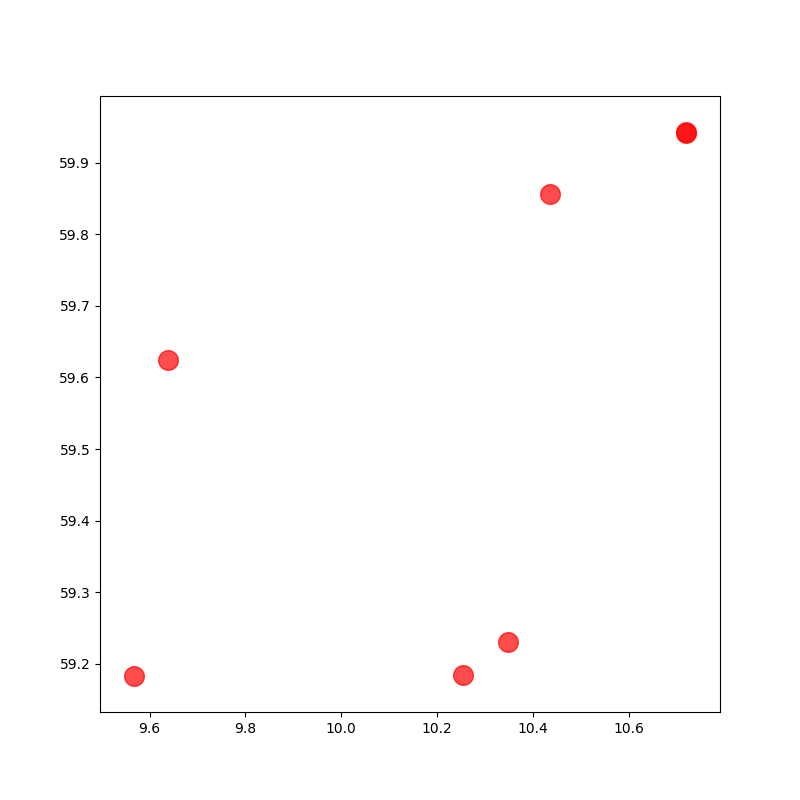

<IPython.core.display.Javascript object>


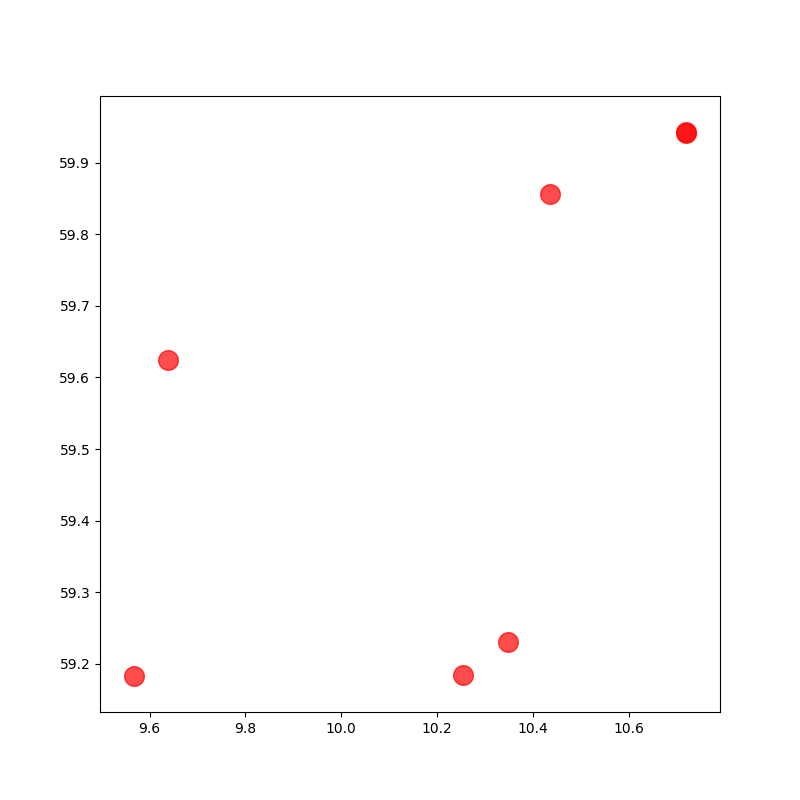

In [49]:
plt.figure(figsize=(8,8))

In [50]:
plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

In [51]:
mplleaflet.display()

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [53]:
df1 = pd.read_csv('./data/C2A2_data/BinnedCsvs_d400/ed157460d30113a689e487b88dcbef1f5d64cbd8bb7825f5f485013d.csv')
df1

,ID,Date,Element,Data_Value
0,USW00003904,2005-10-05,TMIN,228
1,USC00418446,2007-05-31,TMIN,200
2,USC00419491,2006-07-16,TMAX,361
3,USC00418646,2010-11-09,TMAX,239
4,USC00418446,2007-05-31,TMAX,317
5,USC00418446,2013-12-29,TMIN,6
6,USC00418446,2008-02-07,TMIN,0
7,USC00419491,2015-11-20,TMAX,267
8,USC00418646,2005-02-23,TMAX,239
9,USC00418646,2007-01-09,TMAX,200


In [54]:
df1 = df1[~(df1['Date'].str.endswith(r'02-29'))]
df1

,ID,Date,Element,Data_Value
0,USW00003904,2005-10-05,TMIN,228
1,USC00418446,2007-05-31,TMIN,200
2,USC00419491,2006-07-16,TMAX,361
3,USC00418646,2010-11-09,TMAX,239
4,USC00418446,2007-05-31,TMAX,317
5,USC00418446,2013-12-29,TMIN,6
6,USC00418446,2008-02-07,TMIN,0
7,USC00419491,2015-11-20,TMAX,267
8,USC00418646,2005-02-23,TMAX,239
9,USC00418646,2007-01-09,TMAX,200
